# Business Understanding

### Stakeholders:
My stakeholders are the Customer Retention Analytics (CRA) team at a telecoms company 'SyriaTel' where I'm a lead datascientist. The CRA team takes a data-driven approach to enhancing customer satisfaction and decreasing churn (when a customer leaves a business). I'm on a team within a centralized datascience and engineering organization. We support various satellite analytics teams including CRA, who distill our datasets further into business metrics, interactive dashboards, and slide deck presentations. The CRA team supports the greater customer retention org, which then implements changes to our incentives program. 

### Problem and Objective:
We lack the ability to identify customers when they're on the cusp of churning. The objective of this project is to predict likely churners. Our dataset includes 20 variables describing over 3,000 current and churned customers. Achieving this predictive ability will allow us to examine the data on a rolling basis and quickly implement targeted incentivization.

### Methodology:
- We use a predictive logistic regression model rather than multiple linear regression because our target variable is categorical rather than numerical and continuous. The modeling process allows us to iteratively guide how the model 'learns' about our data to improve the accuracy of its predictions. While using a machine learning model isn't 'better' than simpler methods of getting at our problem such as SQL analysis, visualizations or EDA, we're focusing on a predictive modeling approach for now. We justify this prioritization because the sooner our CRA team has a customer list for targeted incentivizing, the better. Customer Retention can offer upgrades to those customers and prevent lost business before it occurs.
- This buys us some time while we take a deeper dive into data cleaning, EDA, and inferential modeling. Those methods will complement our predictive model and help to fine-tune it by shedding light on the actual relationships between the predictors and target, and to what extent a given predictor is impacting churn. This way, our retention efforts will become more specific and strategic. Our aim is to strike a balance between preventing lost business and wasting money on extravagant incentives.
- This project will serve as a solution to identification of customers who are about to churn. Then, we can get into the weeds of discovering the precise correlations and causations of churn. All the while, our predicitve model will be acting as a stop-gap to minimize lost business.

# Data Understanding

### Source
- [Kaggle: "Churn in Telecom's dataset"](https://www.kaggle.com/datasets/becksddf/churn-in-telecoms-dataset)

### Overview:
- This is a dataset of 3,333 customers from a fictional telecoms company "SyriaTel." The 20 features include geographical information about customers, the time they spend on day vs. evening vs. nighttime calls, whether they have a voice mail or internation plan, and the length of their account number which indicates the relative amount of time they've been a customer. Account number is therefore a great proxy for customer lifetime value.


| Variable | Definition | Key/Notes |
| -------- | -------- | -------- |  
| churn | Has customer ceased doing business with SyriaTel | False = has not churned, True = has churned 
| state | US State | Categorical number that must be one-hot-encoded. NOT ordinal.|
| account length | Smaller number (length) indicates older account | Proxy for Customer Lifetime Value |
| area code | Phone number area code | |
| phone number | Phone number | |
| international plan | Customer has intl. plan | 'yes', 'no'(note: although categorical, this is already 'one hot encoded' because it is binary) |
| voice mail plan | Customer has voice mail plan | 'yes', 'no'(see above)|
| number **vmail** messages | Total voice mail messages customer has left | | |
|
| total **day** minutes | Total daytime *minutes*
| total **day** calls | Total daytime *calls*
| total **day** charge | Total daytime *charges*
|
| total **eve** minutes | Total evening *minutes*
| total **eve** calls | Total evening *calls*
| total **eve** charge | Total evening *charges*
|
| total **night** minutes | Total nighttime *minutes*
| total **night** calls | Total nighttime *calls*
| total **night** charge | Total nighttime *charges*
|
| total **intl** minutes | Total international *minutes* | Includes daytime, evening, and nighttime
| total **intl** calls | Total international *calls*| Includes daytime, evening, and nighttime
| total **intl** charge | Total international *charges* | Includes daytime, evening, and nighttime
|
| **customer service** calls | Total customer services *calls* placed by customer |

# Import Data and Libraries:

In [570]:
# Import Required Python Libraries:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector as selector

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import log_loss

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

# Hides warnings
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)
warnings.filterwarnings(action='ignore',module='sklearn')

In [571]:
# Import Data:
df = pd.read_csv('./data.csv')

# EDA:

In [572]:
# Preview all columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [573]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [574]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### Discussion of info, head, and describe output:
- There are 3,333 individuals and 20 predictors to use for the target variable "churn." Most features are numeric with the exception of `state` which is categorical and must be one-hot-encoded.
- No Nulls
- Boolean value columns -- they don't need to be one-hot-encoded, just converted from yes/no ---> 1/0
  - international plan
  - voice mail plan

#### Calls vs. Minutes
  - The more calls doesn't necessarily mean more minutes, so we will keep calls and minutes (they are not redundant)

#### Outliers:
  - There are individuals who have 0 calls, minutes, and messages in all categories (Day, Evening, International) *except* for night minutes, calls, and charges. The minimum night calls is 33 and minimum night minutes is 23.2. This seems like an outlier - How could someone make 33 calls in 23.2 minutes but have 0 for all other categories?

#### Area code and Phone Number:
  -  Phone numbers and State do not match  (See 1st row from .head() output above: 415 is not an area code in Kansas)
  -  `state` may be a useful geographical feature to consider, but lots of people live in states that don't match their phone #'s area code, so area code isn't a reliable indicator of location.
  -  We'll go ahead and drop area code & phone number because of the aforementioned

# Data Cleaning

In [575]:
# Convert yes/no values to 0/1 so they can be fed through logistic regression:
df['international plan'] = df['international plan'].replace(to_replace=['no', 'yes'], value=[0, 1])
df['voice mail plan'] = df['voice mail plan'].replace(to_replace=['no', 'yes'], value=[0, 1])

In [576]:
# Convert target variable from True/False to 1/0
# Prior convention: False = has not churned, True = has churned
 
# We will convert to this convention: 0 = False, 1 = True
df['churn'] = df['churn'].replace(to_replace=[False, True], value=[0, 1])

In [577]:
# We have an imbalanced dataset skewed towards False
df.value_counts('churn')

churn
0    2850
1     483
dtype: int64

# Define Modeling Class ModelWithCV()
- Adapted from Flatiron School's Phase03, Lecture #42, 'Workflow with Pipelines'
- This class inputs a model and outputs a crossvalidation score based on training data + visualizations
- I'm going to add `log_loss` to the cross validation results because it's analogous to Root-mean squared error, which looks at average of difference between the predicted probabilities (from logistic regression) of how far off our predicted class is from an individual's actual class is.
- It's basically a overall measure of how well the model is doing.
- For interpreting `log_loss`, the smaller the value, the better.

In [578]:
class ModelWithCV():
    '''Structure to save the model and more easily see its crossvalidation'''
    
    def __init__(self, model, model_name, X, y, cv_now=True):
        self.model = model
        self.name = model_name
        self.X = X
        self.y = y
        # For CV results
        self.cv_results = None
        self.cv_mean = None
        self.cv_median = None
        self.cv_std = None
        #
        if cv_now:
            self.cross_validate()
        
    def cross_validate(self, X=None, y=None, kfolds=10):
        '''
        Perform cross-validation and return results.
        
        Args: 
          X:
            Optional; Training data to perform CV on. Otherwise use X from object
          y:
            Optional; Training data to perform CV on. Otherwise use y from object
          kfolds:
            Optional; Number of folds for CV (default is 10)  
        '''
        
        cv_X = X if X else self.X
        cv_y = y if y else self.y

        self.cv_results = cross_val_score(self.model, cv_X, cv_y, cv=kfolds)
        self.cv_mean = np.mean(self.cv_results)
        self.cv_median = np.median(self.cv_results)
        self.cv_std = np.std(self.cv_results)

        # Claire Sarraille: Added log_loss for list of results:
        self.cv_neg_log_loss = cross_val_score(self.model, cv_X, cv_y, scoring ='neg_log_loss')
        self.cv_log_loss = -(self.cv_neg_log_loss.mean())

        # To-Do: Claire Sarraille: Added precision, recall, and F-Measure:
   
    def print_cv_summary(self):
        cv_summary = (
        f'''CV Results for `{self.name}` model:
            Accuracy: {self.cv_mean:.5f} ± {self.cv_std:.5f}
            Log Loss: {self.cv_log_loss:.5f}
            10-fold Cross Validation Scores: {self.cv_results}
        ''')
        print(cv_summary)

        
    def plot_cv(self, ax):
        '''
        Plot the cross-validation values using the array of results and given 
        Axis for plotting.
        '''
        ax.set_title(f'CV Results for `{self.name}` Model')
        # Claire Sarraille: Customized plot for cv results
        sns.boxplot(self.cv_results, ax=ax)

        return ax

# Train Test Split

In [579]:
# Create X (predictors) and y (target) variables:
# Here we'll drop area code and phone number while we're at it:
X = df.drop(['area code', 'phone number','churn'], axis = 1).reset_index(drop=True)
y = df.churn.reset_index(drop=True)

# Split Data into train and test:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=666)

# Pipeline Set-Up

In [580]:
# Define predictor features as list of numerical and list of categorical:

# List of numerical features:
numfeat = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# List of categorical features:
catfeat = ['state']

# Our boolean features are ['international plan', 'voice mail plan']
# Boolean features don't need to be scaled, so we will use 'remainder='passthrough''
# To indicate to compiler to let them through pipeline without transformations.

In [581]:
# Pipeline for numerics (SCALE data):

numpipe = Pipeline([
    ('ss', StandardScaler())
])


In [582]:
# Pipeline for categorical feature (One-Hot-Encode):

catpipe = Pipeline([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore')) # Using handle_unknown param en lieu of stratify during train-test-split
])

## We now have our numeric and categorical pipelines.
- Since we don't have any nulls, and binary features don't need to be transformed or one-hot-encoded,
- Our binary features (`international plan` and `voice mail plan`) don't need any transformations, so we will use `remainder='passthrough'` to let them through.
- Next step is to handle columns holistically with `ColumnTransformer`

In [583]:
# We will use our pipeline objects as transformer argument for ColumnTransformer
# our transformer is a tuple and includes a columns argument

ColTrans = ColumnTransformer(transformers=[
    ('numerics', numpipe, numfeat),
    ('categoricals', catpipe, catfeat)
], remainder='passthrough')

# Model #1: Baseline Dummy
- For our dummy model, the only variables we are excluding are `area code` and `phone number` because we've determined these columns don't contain information that signifies geographical location or any other information that would correlate to churn.

In [584]:
# Create Dummy Model Pipeline

dumpipe = Pipeline([
    ('ct', ColTrans),
    ('dummy', DummyClassifier(strategy='most_frequent'))
])

In [585]:
# Fit the dummy regressor to the training data:
dumpipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerics',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                 

## *Training* Accuracy Score for **Dummy Model**:
- Predicts the likelihood of getting the majority class by simply dividing majority/total positive class in training set: [2132/[2132 + 367]]. Goal is for our next model to do better than this!

Dummy model TRAIN Mean Accuracy score: 0.85314

Target value counts
0    2132
1     367
Name: churn, dtype: int64


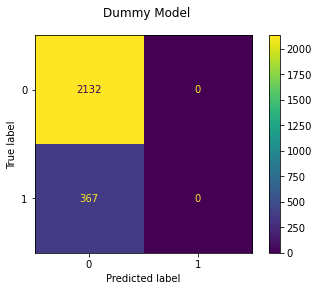

In [586]:
# Training Data Confusion Matrix:

fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dumpipe, X_train, y_train, ax=ax, cmap='viridis');

print(f'Dummy model TRAIN Mean Accuracy score: {dumpipe.score(X_train, y_train):.5f}')
print()
print('Target value counts')
print(y_train.value_counts())

## Using Cross-Validation for model validation on 'unseen' data rather than test dataset:

In [587]:
# Now let's instantiate a dummy pipeline model and fit via inheritance from the ModelWithCV class:
dum_pipe_cv = ModelWithCV(
    dumpipe,
    model_name='dummy',
    X=X_train,
    y=y_train,
)

CV Results for `dummy` model:
            Accuracy: 0.85314 ± 0.00175
            Log Loss: 5.07231
            10-fold Cross Validation Scores: [0.852      0.852      0.852      0.852      0.852      0.852
 0.852      0.856      0.856      0.85542169]
        


/Users/claire/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'CV Results for `dummy` Model'}>

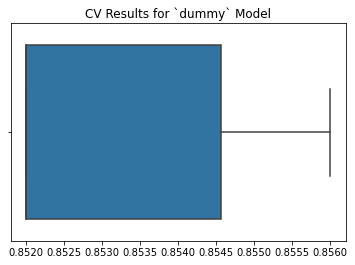

In [588]:
# Print Cross-validation summary:
dum_pipe_cv.print_cv_summary()

# Box Plot of Accuracy:
fig, ax =plt.subplots()
dum_pipe_cv.plot_cv(ax=ax)

## Interpreting Dummy Model Validation
- The accuracy score doesn't tell us much here - the dummy model is simply predicting the majority class for every observation, so accuracy = majority class/sum of all classes = .85314
- Our log loss score is VERY high. We interpret it as the average difference between the predicted probabilities (from logistic regression) of how far off our predicted class is from an individual's actual class.
- This is not a good model! But that is expected. It can only get better from here.
- The box plot visually summarizes the mean of our 10-fold cross-validation scores: 0.85

# Model #2: First Simple Model (FSM):

In [589]:
# Create First Simple Model Pipeline

firstpipe = Pipeline([
    ('ct', ColTrans),
    ('fsm', LogisticRegression())
])

In [590]:
# Fit the fsm regressor to the training data:

firstpipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerics',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                 

## *Training* Accuracy Score for **FSM**:

FSM model TRAIN Mean Accuracy score: 0.86995

Target value counts
0    2132
1     367
Name: churn, dtype: int64


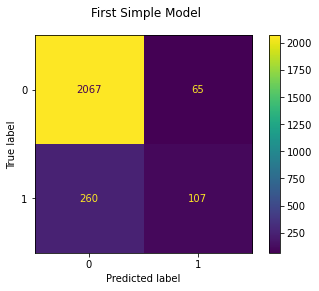

In [591]:
# Training Data Confusion Matrix:

fig, ax = plt.subplots()

fig.suptitle('First Simple Model')

plot_confusion_matrix(firstpipe, X_train, y_train, ax=ax, cmap='viridis');

print(f'FSM model TRAIN Mean Accuracy score: {firstpipe.score(X_train, y_train):.5f}')
print()
print('Target value counts')
print(y_train.value_counts())

## FSM: Validation Metrics using Cross Validation:

In [592]:
first_pipe_cv = ModelWithCV(
    firstpipe,
    model_name='fsm',
    X=X_train,
    y=y_train
)


CV Results for `fsm` model:
            Accuracy: 0.85955 ± 0.02154
            Log Loss: 0.33334
            10-fold Cross Validation Scores: [0.868      0.86       0.892      0.872      0.848      0.868
 0.86       0.808      0.844      0.87550201]
        


/Users/claire/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'CV Results for `fsm` Model'}>

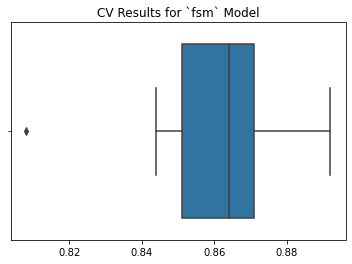

In [593]:
fig, ax =plt.subplots()

first_pipe_cv.print_cv_summary()

first_pipe_cv.plot_cv(ax=ax)

## Interpreting the FSM:
- We've reduced our log loss from 5.07231 to 0.33334. 
- We can use log loss as a validation metric to compare models. We must use the log loss from cross-validation or held-out test data to compare. We'll continue using cross-validation to produce our validation metrics until we get to our final model, whereupon we'll use the held-out testing dataset.
- The FSM's mean accuracy is higher in cross-validation than training, indicating there may be some overfitting going on.
  - However, using accuracy as a validation metric isn't valid for this situation because our target class sizes are imbalanced.
- The box plot visually summarizes the mean of our 10-fold cross-validation scores: 0.86

# Model #3: SMOTE + First Simple Model (Address target class imbalance)

- We're going to apply SMOTE to our first simple model right off the bat, because otherwise we won't be able to accurately estimate our model's accuracy.
- Note: SMOTE is generally better solution to class imbalance than under-sampling the majority class (using stratify parameter during train-test-split)
- I'm not sure that SMOTE is the best approach for this business problem, however. I need to look at the confusion matrix and determine whether predicting
- See: https://stats.stackexchange.com/questions/569935/smote-vs-stratified-sampling-in-highly-imbalanced-dataset-classification
  - The reason for balancing etc. is actually because the misclassification costs are not equal, but this has nothing to do with the imbalance per se, it is just that imbalanced learning problems tend to be ones with obviously unequal costs. For example, I suspect it is a far worse error to classify a patient as not being at risk of stroke when they are (they may go home untreated, have a stroke and die) than to classify them as at risk of stroke when they are not (they will just be subjected to unnecessary further testing). We should be considering misclassification costs anyway, regardless of imbalance.

In [594]:
# We'll go ahead and just use Cross-validation for now to validate our first simple model
# But first, we need to address the class imbalance of our y_train
# If we don't address class imbalance now, our accuracy score won't be especially meaningful

# True = 1
# False = 0

# Is there a better way to address 'misclassification costs' than using SMOTE?
# Here, if we don't address the imbalance, we'll have potentially more False negatives
# Which would mean we're missing people who are gonna churn.

print(y_train.value_counts())


0    2132
1     367
Name: churn, dtype: int64


In [595]:
# Instantiate SMOTE object from class:
sm = SMOTE(sampling_strategy='auto', random_state=42)

In [596]:

smotepipe = ImPipeline(steps=[
    ('ct', ColTrans),
    ('sm', SMOTE(random_state=42)),
    ('fsm', LogisticRegression())
])

In [597]:
smotepipe.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerics',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['account length',
                                                   'number vmail messages',
                                                   'total day minutes',
                                                   'total day calls',
                                                   'total day charge',
                                                   'total eve minutes',
                                                   'total eve calls',
                                                   'total eve charge',
                                                   'total night minutes',
                                                 

## *Training* Accuracy Score for **FSM + SMOTE**:

SMOTE model TRAIN Mean Accuracy score: 0.79952


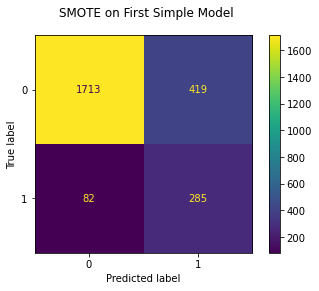

In [598]:
# Training Data Confusion Matrix:

fig, ax = plt.subplots()

fig.suptitle('SMOTE on First Simple Model')

plot_confusion_matrix(smotepipe, X_train, y_train, ax=ax, cmap='viridis');

print(f'SMOTE model TRAIN Mean Accuracy score: {smotepipe.score(X_train, y_train):.5f}')

## FSM + SMOTE: *Validation Metrics* using Cross Validation:

In [599]:
# Fit SMOTE/FSM to training data using cross-validation on training data:
smote_pipe_cv = ModelWithCV(
    smotepipe,
    model_name='smote',
    X=X_train,
    y=y_train
)


CV Results for `smote` model:
            Accuracy: 0.77591 ± 0.03372
            Log Loss: 0.50996
            10-fold Cross Validation Scores: [0.808      0.752      0.812      0.8        0.788      0.744
 0.808      0.704      0.756      0.78714859]
        


/Users/claire/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'CV Results for `smote` Model'}>

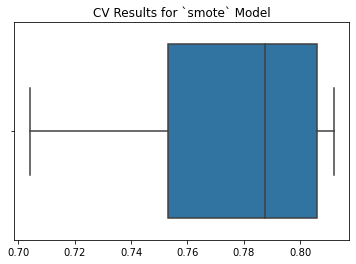

In [600]:
fig, ax =plt.subplots()

smote_pipe_cv.print_cv_summary()

smote_pipe_cv.plot_cv(ax=ax)

## Interpretation:
- Because our mean accuracy decreased between training and validation, we may be able to conclude that our model is overfit.
- However, even though we applied SMOTE to adjust for imbalance, there is still a concern that accuracy is not a great indicator or model performance.
- For our next model, we'll concentrate on lowering log loss.
- We will use GridSearch as a way to try and tune hyperparameters.

# Final Model: Hyperparameter Optimization via GridSearch
- Choosing how to set a hyperparameter is somewhat of a 'black box' problem - it's difficult to determine or guess how to tune them.
- Thus, we want a way to conduct hyperparameter tuning, and we can accomplish via GridSearch.

## Define Search Space:
- The search space is a dictionary where the keys are the hyperparameters you choose to optimize, and the values are a list of possible variations/options for each hyperparameter to search.

In [601]:
# Instantiate pipeline object (will be unchanged from smotepipe)

gspipe = ImPipeline(steps=[
    ('ct', ColTrans),
    ('sm', SMOTE(random_state=42)),
    ('lr', LogisticRegression())
])

#### Available Hyperparameters
- Below I'll select which hyperparameters for my LogisticRegression to include in my grid search - those that are prefixed with `lr__` indicate they belong to the `lr` element of my `grpipe`.
- `grpipe`'s full list of hyperparameters includes those for the ColTrans and SMOTE elements of our pipeline - but tuning those is out of scope for this project.


In [602]:
# Print all of my LogisticRegression() object's hyperparameters:
for key in gspipe.get_params().keys():
    if key.startswith('lr__'):
        print(key)

lr__C
lr__class_weight
lr__dual
lr__fit_intercept
lr__intercept_scaling
lr__l1_ratio
lr__max_iter
lr__multi_class
lr__n_jobs
lr__penalty
lr__random_state
lr__solver
lr__tol
lr__verbose
lr__warm_start


### Choosing Hyperparameters for Grid Search
- I decided on the below hyperparameters and list of options for each by reading up on those commonly used in the machine learning community for tuning logistic regression models. I settled on the below recommended via [machinelearningmastery.com](https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/)
- See **Interpreting the `best_params_`** section below for more discussion on my choices and what they mean.

In [603]:
search_space=[{'lr__solver':['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag'],
                'lr__penalty':['none', 'l1', 'l2', 'elasticnet'],
                'lr__C': [100, 10, 1.0, 0.1, 0.01]
               }]

grid_search = GridSearchCV(gspipe, search_space, n_jobs=-1, cv=5)


In [604]:
# Fit grid search regressor to training data:

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('ct',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numerics',
                                                                         Pipeline(steps=[('ss',
                                                                                          StandardScaler())]),
                                                                         ['account '
                                                                          'length',
                                                                          'number '
                                                                          'vmail '
                                                                          'messages',
                                                                          'total '
                                                       

In [605]:
print('Best Hyperparameters: %s' % grid_search.best_params_)

Best Hyperparameters: {'lr__C': 0.1, 'lr__penalty': 'l2', 'lr__solver': 'newton-cg'}


In [606]:
grid_search.best_score_

0.7847134268537074

In [607]:
final_model = grid_search.best_estimator_

### Interpreting the `best_params_`
- The best `penalty` hyperparameter was found to be `l2` by our grid search. This is not surprising because the model we fed into gridsearch was slightly overfit and could be corrected by increasing regularization/penalty. When a model is overfit, it needs to be more generalized as it has low bias and high variance. An overfit model will not be 'general' enough to effectively predict on unseen data. Luckily, our pipeline included scaling from the get-go. Scaling is necessary for l2 regularization as it is distance-based.
- The `C` value is responsible for defining the strength of regularization/penalty, which here is `l2.`
- The solver chosen is `newton-cg.` The `solver` is a hyperparameter that dictates how we solve the function (loss function) that minimizes error (loss). The point on the loss function where loss is the smallest is the point where, when we take the partial derivative, the slope of that tangent line is equal to 0. `newton-cg` is a way of going about gradient descent that uses a different kind of quadratic function (loss function) to find that sweet spot where the slope of the tangent line is 0.

## *Training* Accuracy Score for **Final Model**:

GridSearch model TRAIN Mean Accuracy score: 0.79432


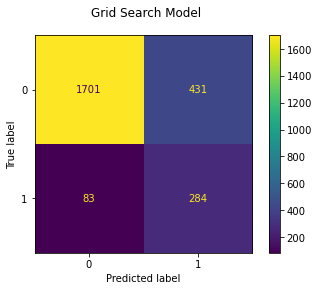

In [608]:
# Training Data Confusion Matrix:

fig, ax = plt.subplots()

fig.suptitle('Grid Search Model')

plot_confusion_matrix(final_model, X_train, y_train, ax=ax, cmap='viridis');

print(f'GridSearch model TRAIN Mean Accuracy score: {final_model.score(X_train, y_train):.5f}')

## Test Final Model on Unseen Hold-Out Test Set:
- After validating our models 1-3 using cross-validation, we will now use our held-out testing data to validate our final model!

Final model TEST Mean Accuracy score: 0.74460
Final model TEST Log Loss: 0.53875


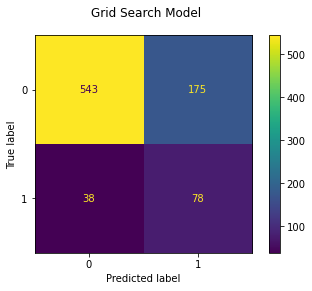

In [609]:
# Training Data Confusion Matrix:

fig, ax = plt.subplots()

fig.suptitle('Grid Search Model')

plot_confusion_matrix(final_model, X_test, y_test, ax=ax, cmap='viridis');

print(f'Final model TEST Mean Accuracy score: {final_model.score(X_test, y_test):.5f}')
print(f'Final model TEST Log Loss: {log_loss(y_test, final_model.predict_proba(X_test)):.5f}')

# Evaluation
- Dummy Model ---> FSM: 
  - *Log Loss* decreased from 5.1 ---> 0.3
- FSM ---> SMOTE + FSM:
  - *Log Loss* increased from .3 ---> .51
  - *Accuracy* becomes a useful validation metric because we addressed class imbalance with SMOTE
-  Change from SMOTE + FSM ---> Final Model:
   -  *Log Loss* increased from 0.51 ---> 0.54
   -  *Accuracy* decreased from 0.78 ---> 0.74


# Conclusion
This was a good place to start in our endeavor to predict customer churn. We were able to address class imbalance so that Accuracy is now a useful validation measure. We ran a Grid Search to optimize these hyperparameters: Regularization ("penalty"), penalty intensity ("C"), and loss function solver ("solver"). We found that applying Grid Search and using the resulting model with hyperparameters C=0.1, penalty=l2, and solver=newton-cg increased log loss and decreased accuracy compared to the cross-validation results from our SMOTE+FSM model. This result begs more question, in particular about overfitting. Because the degree of overfitting wasn't seen until we tested on the hold-out dataset, we may want to decrease complexity of features to reduce noise, perhaps by grouping "state" by the highest level of LG speed that state has. This might be a better signal and by grouping states into these larger categories we reduce the noise caused by too many features. Another opportunity is to explore other validation metrics such as the F-statistic, Recall, and precision.